# 1. Importar librerias

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
from geopandas import GeoDataFrame

In [2]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

# 2. Cargar y procesar datos

In [6]:
contraloria_data               = pd.read_stata( r'../../input/built_data/c1.dta' )
contraloria_data[ 'corrup_intensa' ]

0       No
1       Sí
2       Sí
3       Sí
4       Sí
        ..
2178    Sí
2179    Sí
2180    Sí
2181    Sí
2182    Sí
Name: corrup_intensa, Length: 2183, dtype: category
Categories (2, object): ['No' < 'Sí']

In [4]:
contraloria_data               = pd.read_stata( r'../../input/built_data/c1.dta' )

contraloria_data[ 'ci_count' ] = contraloria_data[ 'corrup_intensa' ].map( { 'Sí': 1, 'No': 0 } )
contraloria_data[ 'ci_count' ] = contraloria_data[ 'ci_count' ].astype( str ).astype( int )

contraloria_data[ 'ca_count' ] = contraloria_data[ 'corrup_amplia' ].map( { 'Sí': 1, 'No': 0 } )
contraloria_data[ 'ca_count' ] = contraloria_data[ 'ca_count' ].astype( str ).astype( int )

contraloria_data               = contraloria_data[ contraloria_data[ 'year' ] <= 2020 ]

vars_list                      = [ 'ubigeo', 'ci_count', 'ca_count', 'per_corrup1', 'per_corrup2', 'monto' ]
contraloria_data               = contraloria_data[ vars_list ]

contraloria_data               = contraloria_data.groupby( 'ubigeo' ).sum().reset_index()

In [5]:
shp_data = gpd.read_file( r'../../input/shape_file/DISTRITOS.shp' )
shp_data = shp_data.rename( columns = { 'IDDIST': 'ubigeo' } )
shp_data = shp_data[ [ 'ubigeo', 'geometry' ] ]

In [6]:
data = pd.merge( contraloria_data, 
                 shp_data, 
                 on = 'ubigeo', 
                 how = 'right' )

data = GeoDataFrame( data )

# 3. Mapas

### 3.1. Corrupción intensa

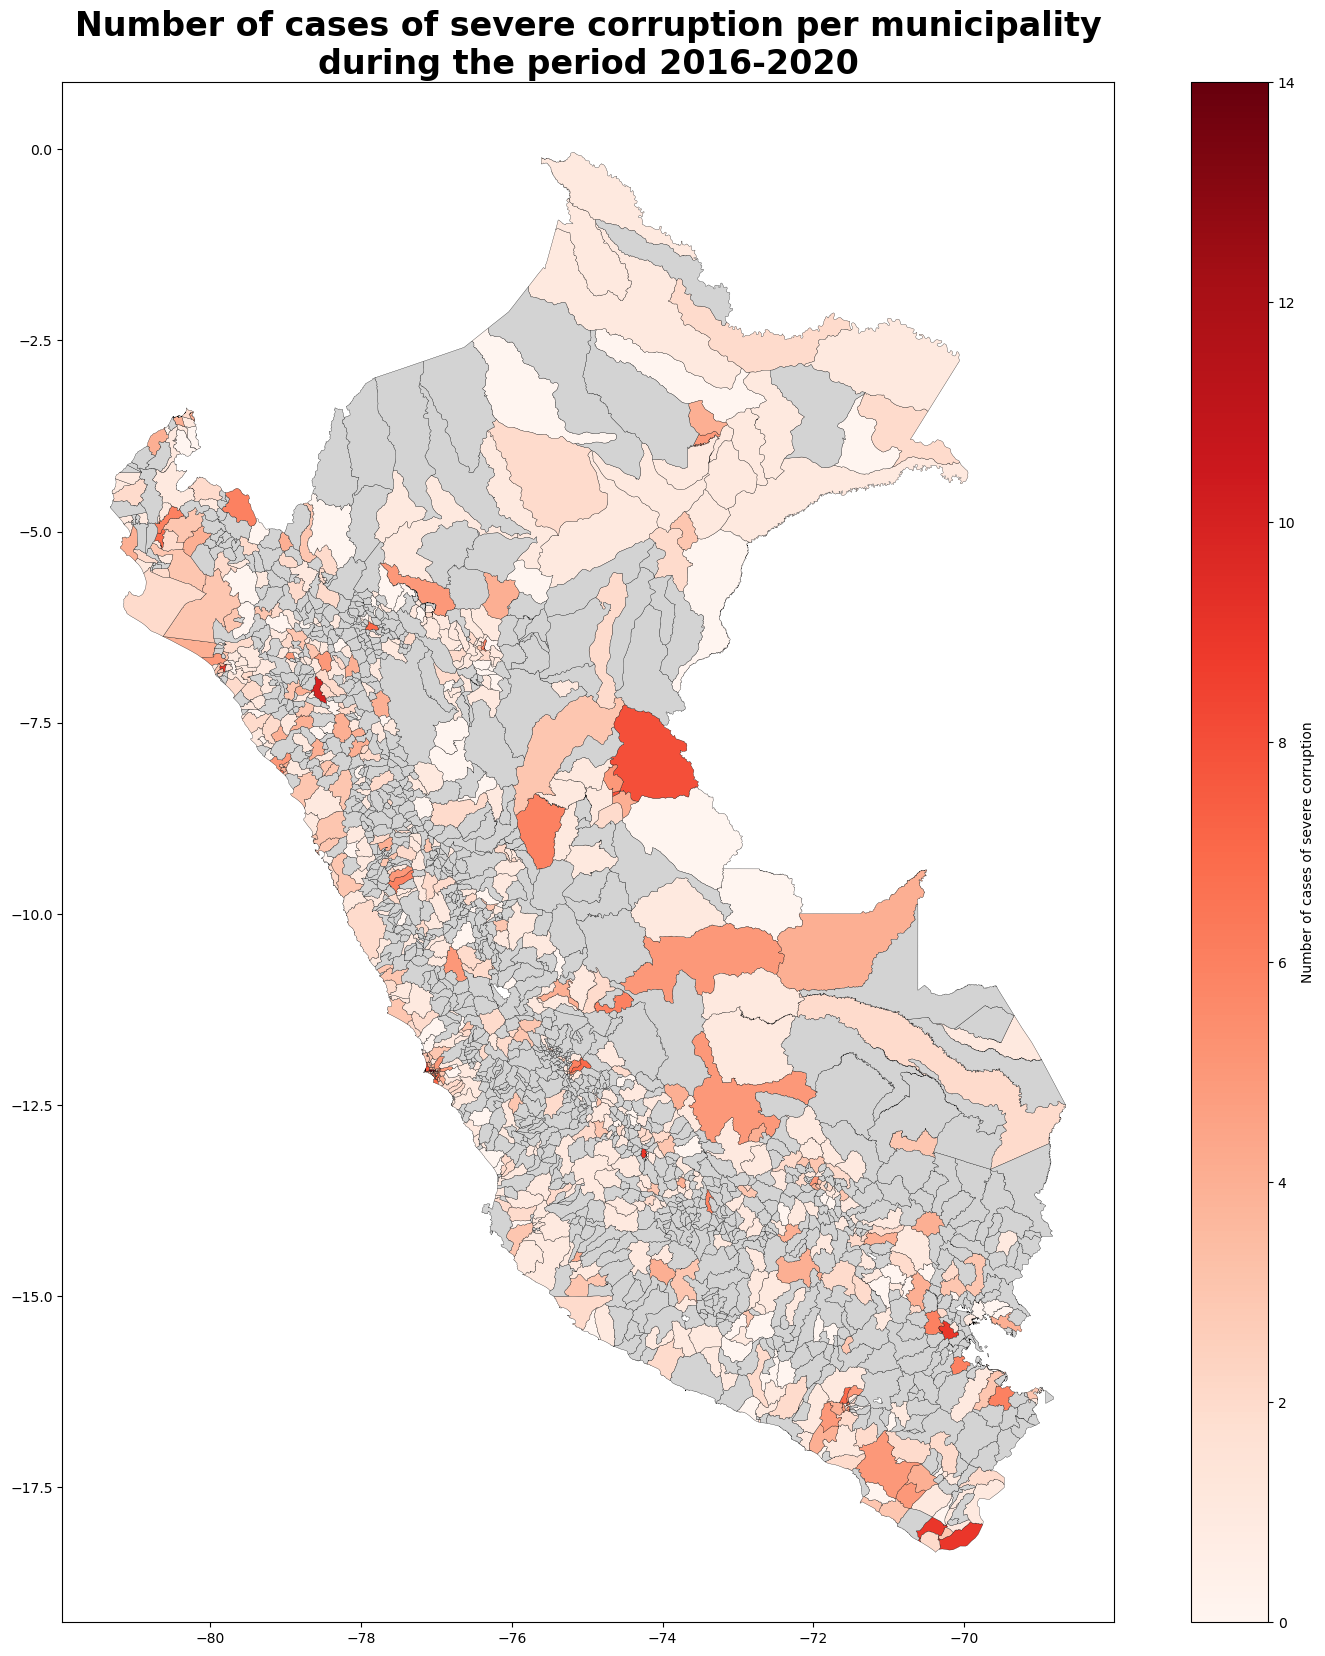

In [22]:
data.plot( column       = 'ci_count',
           cmap         = 'Reds',
           figsize      = ( 20, 20 ),
           linestyle    = '-',
           edgecolor    = 'black',
           legend       = True,
           linewidth    = 0.2,
           legend_kwds  = { 'label': 'Number of cases of severe corruption' },
           missing_kwds = { 'color': 'lightgrey',
                            'edgecolor': 'black'
                          } )

title_text = 'Number of cases of severe corruption per municipality\nduring the period 2016-2020'

plt.title( title_text,
           fontsize   = 24,
           fontweight = 'bold', 
           loc        = 'center' )

plt.savefig( r'../../extra/graphs/ci_map.jpg' , 
             dpi         = 300, 
             bbox_inches = 'tight' )

plt.show()

### 3.2. Corrupción amplia

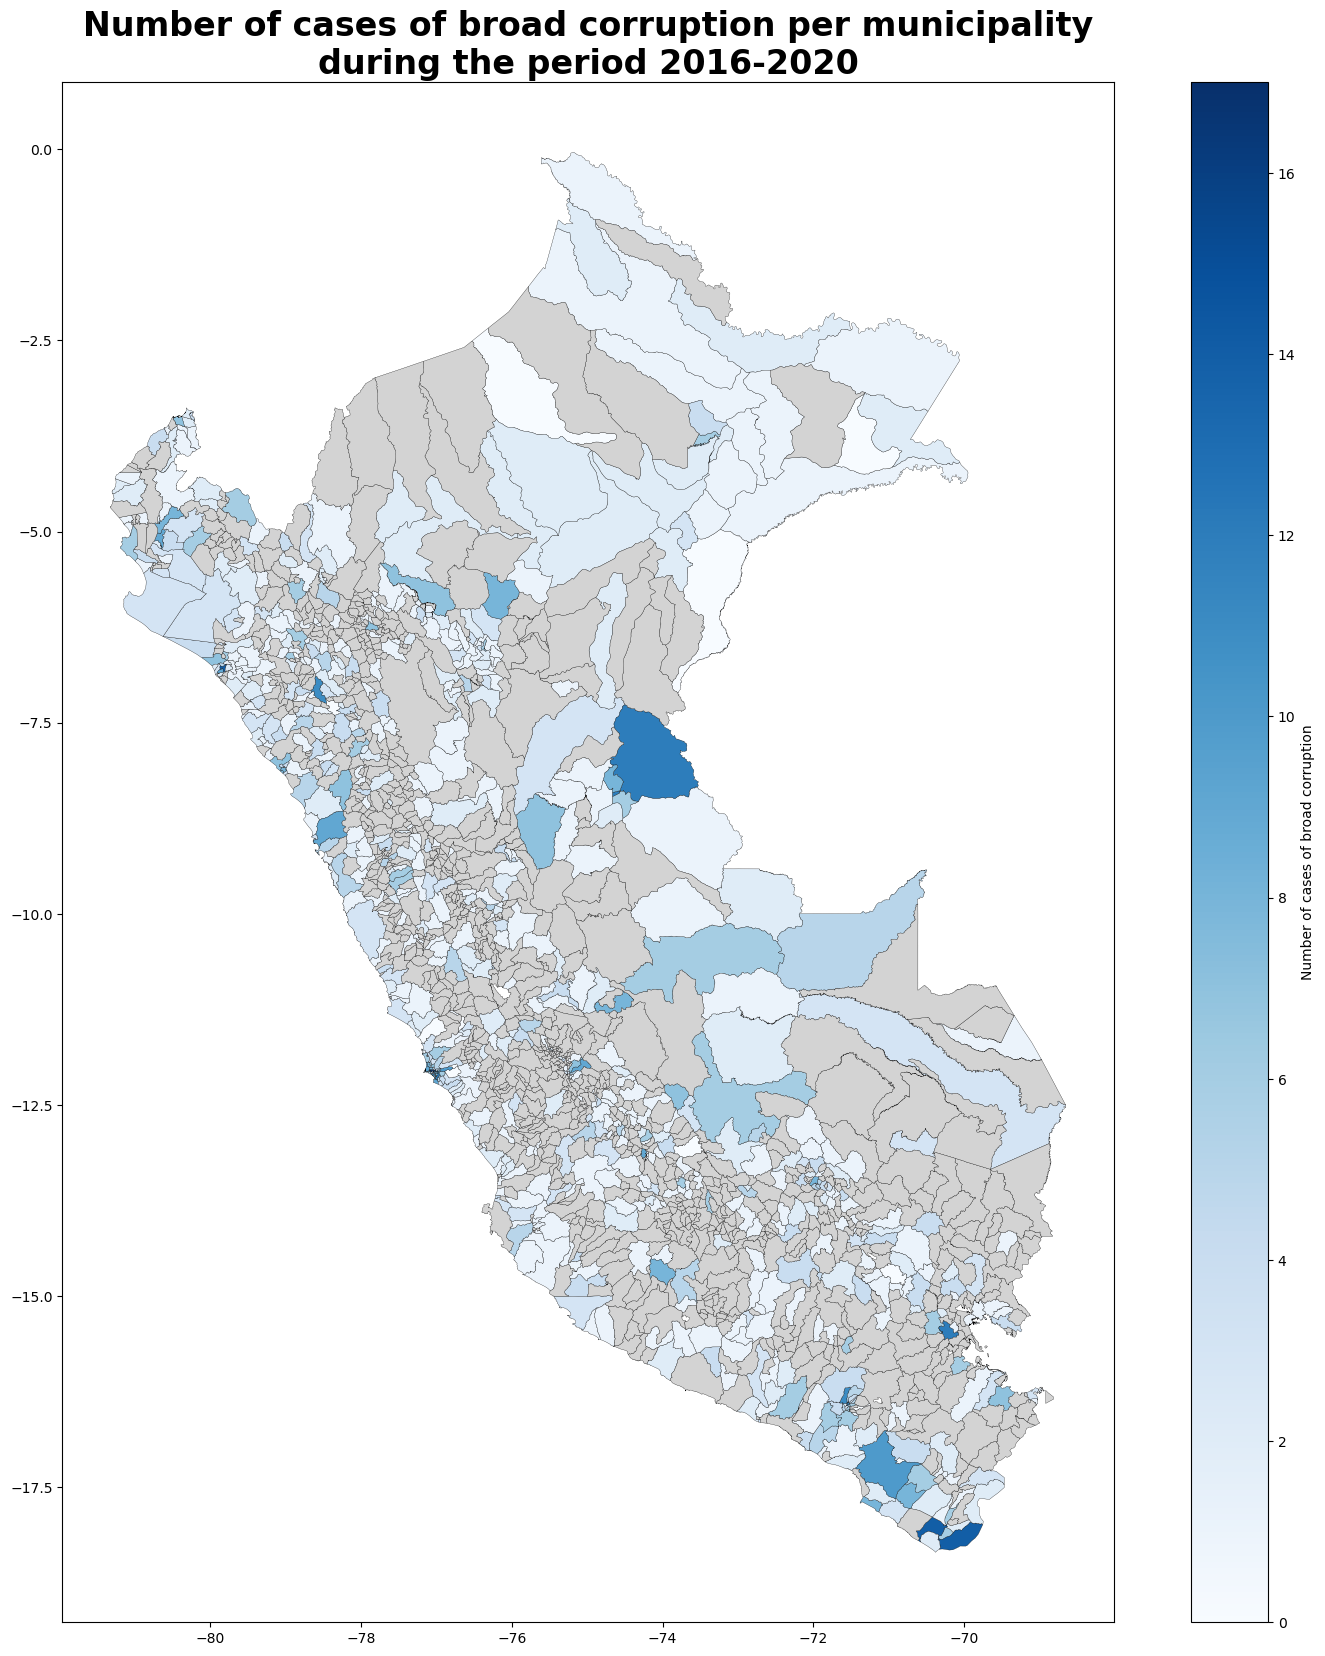

In [24]:
data.plot( column      = 'ca_count',
           cmap        = 'Blues', 
           figsize     = ( 20, 20 ),
           linestyle   = '-',
           edgecolor   = 'black',
           legend      = True,
           linewidth   = 0.2,
           legend_kwds = { 'label': "Number of cases of broad corruption", 
                           'orientation': 'vertical' },
           missing_kwds = { 'color': 'lightgrey',
                            'edgecolor': 'black'
                          } )

title_text = 'Number of cases of broad corruption per municipality\nduring the period 2016-2020'
plt.title( title_text,
           fontsize   = 24,
           fontweight = 'bold', 
           loc        = 'center' )

plt.savefig( r'../../extra/graphs/ca_map.jpg' , 
             dpi         = 300, 
             bbox_inches = 'tight' )

plt.show()